# Bulid the ansatz circuit

In [6]:
%%writefile Define_Ansatz.py

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
import scipy.optimize as op

def f(x,S):
    dx = 10**(-15)
    return -np.cos(x/2)**2 * np.log(np.cos(x/2)**2 + dx) - np.sin(x/2)**2 * np.log(np.sin(x/2)**2 + dx) - S

def V(circ,S):
    N = len(circ.qubits)
    j = int(S/np.log(2))
    if j >= N:
        raise NameError("An entropy of "+str(S)+" requires at least "+str(j+1)+" qubits.")
    dS = S - j*np.log(2)
    phi = op.brentq(f,0,np.pi/2, args = (dS))
    for i in range(j):
        circ.h(i)
    circ.ry(phi,j)
    circ.z(j)
    return circ

def Ui(cir_i,phi_i):  
    Q = len(phi_i)
    for q in range(0,Q):
        cir_i.ry(phi_i[q],q)
    for q in range(0,Q,4):
        if q+1 < Q:
            cir_i.cx(q,q+1)
        if q + 3 < Q:
            cir_i.cx(q+3,q+2)
    for q in range(1,Q,4):
        if q+1 < Q:
            cir_i.cx(q,q+1)
        if q + 3 < Q:
            cir_i.cx(q+3,q+2)
    return cir_i

def U(cir,phi_b):
    T = len(phi_b)
    for t in range(T):
        cir = Ui(cir,phi_b[t])
    return cir

def Ui_alt(cir_i,phi_i):  
    Q = len(phi_i)
    for q in range(0,Q):
        cir_i.ry(phi_i[q],q)
    for q in range(0,Q,4):
        if q+1 < Q:
            cir_i.cx(q,q+1)
            cir_i.cx(q+1,q)
        if q + 3 < Q:
            cir_i.cx(q+3,q+2)
            cir_i.cx(q+2,q+3)
    for q in range(1,Q,4):
        if q+1 < Q:
            cir_i.cx(q,q+1)
            cir_i.cx(q+1,q)
        if q + 3 < Q:
            cir_i.cx(q+3,q+2)
            cir_i.cx(q+2,q+3)
    return cir_i

def U_alt(cir,phi_b):
    T = len(phi_b)
    for t in range(T):
        cir = Ui_alt(cir,phi_b[t])
    return cir

def A(cir,S,phi):
    cir = V(cir,S)
    cir.barrier()
    cir.measure(cir.qubits,cir.clbits)
    cir.barrier()
    cir = U(cir,phi)
    return cir
    

def cir_A(S,phi):
    Q = len(phi[0])
    qr = QuantumRegister(Q)
    cr = ClassicalRegister(Q)
    cir = QuantumCircuit(qr , cr)
    cir = A(cir,S,phi)
    return cir

def A_alt(cir,S,phi):
    cir = V(cir,S)
    cir.barrier()
    cir.measure(cir.qubits,cir.clbits)
    cir.barrier()
    cir = U_alt(cir,phi)
    return cir
    

def cir_A_alt(S,phi):
    Q = len(phi[0])
    qr = QuantumRegister(Q)
    cr = ClassicalRegister(Q)
    cir = QuantumCircuit(qr , cr)
    cir = A_alt(cir,S,phi)
    return cir

Overwriting Define_Ansatz.py


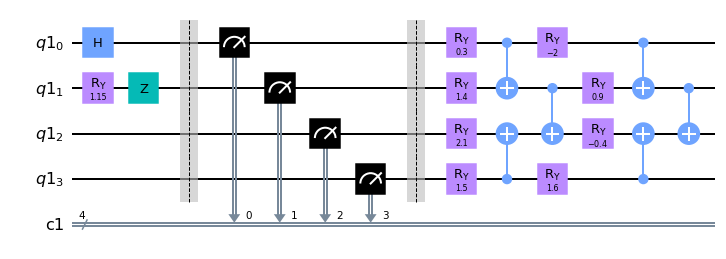

In [5]:
cir_A(1.3,[[0.3,1.4,2.1,1.5],[-2.0,0.9,-0.4,1.6]]).draw(output = 'mpl')